In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [ ]:
column_names=['age','sex','bmi','children','smoker','region','charges']

In [ ]:
dataset=pd.read_csv('/content/sample_data/datasets_13720_18513_insurance.csv')

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dataset=dataset.drop(dataset.index[0])

In [ ]:
dataset['sex']=dataset['sex'].astype('category')
dataset['sex']=dataset['sex'].cat.codes
dataset['smoker']=dataset['smoker'].astype('category')
dataset['smoker']=dataset['smoker'].cat.codes
#dataset['region']=dataset['region'].astype('category')
#dataset['region']=dataset['region'].cat.codes

In [ ]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['sex'],prefix='')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['smoker'],prefix='smoking')],axis=1)
dataset=pd.concat([dataset,pd.get_dummies(dataset['region'],prefix='')],axis=1)



In [ ]:
dataset=dataset.drop(['smoker'],axis=1)


In [ ]:
dataset=dataset.drop(['region'],axis=1)


In [ ]:
dataset=dataset.drop(['sex'],axis=1)

In [ ]:
dataset.head()

,age,bmi,children,charges,_female,_male,smoking_no,smoking_yes,_northeast,_northwest,_southeast,_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:

28,33.00,3,4449.46200,0,1,1,0,0,0,1,0




In [ ]:
train_dataset=dataset.sample(frac=0.8,random_state=0)
test_dataset=dataset.drop(train_dataset.index)

In [ ]:
train_stats=train_dataset.describe()

In [ ]:
train_stats

,age,bmi,children,charges,_female,_male,smoking_no,smoking_yes,_northeast,_northwest,_southeast,_southwest
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.036449,30.735164,1.093458,13056.551488,0.501869,0.498131,0.800935,0.199065,0.248598,0.235514,0.281308,0.234579
std,14.142122,6.064314,1.211364,11994.260192,0.500230,0.500230,0.399484,0.399484,0.432402,0.424518,0.449848,0.423934
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.315000,0.000000,4565.996850,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.495000,1.000000,9289.083100,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.800000,2.000000,15826.112723,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,60021.398970,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_stats.pop('charges')
train_stats=train_stats.transpose()


In [ ]:
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.036449,14.142122,18.00,26.000,39.000,51.0,64.00
bmi,1070.0,30.735164,6.064314,15.96,26.315,30.495,34.8,53.13
children,1070.0,1.093458,1.211364,0.00,0.000,1.000,2.0,5.00
_female,1070.0,0.501869,0.500230,0.00,0.000,1.000,1.0,1.00
_male,1070.0,0.498131,0.500230,0.00,0.000,0.000,1.0,1.00
smoking_no,1070.0,0.800935,0.399484,0.00,1.000,1.000,1.0,1.00
smoking_yes,1070.0,0.199065,0.399484,0.00,0.000,0.000,0.0,1.00
_northeast,1070.0,0.248598,0.432402,0.00,0.000,0.000,0.0,1.00
_northwest,1070.0,0.235514,0.424518,0.00,0.000,0.000,0.0,1.00
_southeast,1070.0,0.281308,0.449848,0.00,0.000,0.000,1.0,1.00


In [ ]:
train_labels=train_dataset.pop('charges')
test_labels=test_dataset.pop('charges')

In [ ]:
def normalize(data,attr):
     return (data-train_stats['mean'][attr])/train_stats['std'][attr]

In [ ]:
train_dataset['bmi']=normalize(train_dataset,'bmi')
test_dataset['bmi']=normalize(test_dataset,'bmi')
train_dataset['age']=normalize(train_dataset,'age')
test_dataset['age']=normalize(test_dataset,'age')

In [ ]:
train_dataset.tail(20)

,age,bmi,children,_female,_male,smoking_no,smoking_yes,_northeast,_northwest,_southeast,_southwest
653,0.421687,2.352259,2,1,0,1,0,0,0,1,0
573,1.623770,5.155544,1,1,0,1,0,1,0,0,0
647,0.068133,1.527763,3,1,0,1,0,1,0,0,0
595,0.492398,2.517158,1,1,0,1,0,1,0,0,0
890,1.765191,5.485342,0,1,0,0,1,0,1,0,0
470,-0.851106,-0.615925,0,0,1,1,0,0,0,1,0
800,0.209555,1.857562,1,1,0,1,0,0,0,1,0
281,1.058084,3.836351,3,0,1,0,1,1,0,0,0
932,0.492398,2.517158,5,0,1,1,0,0,0,0,1
732,-1.063239,-1.110623,3,1,0,1,0,0,0,0,1


In [ ]:
model=tf.keras.models.Sequential([
                             tf.keras.layers.Dense(64,activation='relu',input_shape=[len(train_dataset.keys())]),
                             tf.keras.layers.Dense(32,activation='relu'),
                             tf.keras.layers.Dense(32,activation='relu'),
                         
                                   
                               
                                  tf.keras.layers.Dense(1)     
])



model.compile(loss='mae',
                optimizer="adam")

In [ ]:
print(history.history)

In [ ]:
history=model.fit(train_dataset,train_labels,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13054.6260
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13041.2607
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12967.0625
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12676.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11853.8984
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 10029.6914
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7685.3682
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 6727.8101
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 6423.0317
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 6251.5742
Epoch 11/200
34/34 [==============================] - 0s 2ms/step - loss: 6148.5088
Epoch 12/200
34/34 [==============================] - 0s 2ms/step - loss: 6061.

In [ ]:
test_data=np.array([28,33.00,3,0,1,1,0,0,0,1,0])
#28,33.00,3,4449.46200,0,1,1,0,0,0,1,0
test_predict=model.predict(test_dataset,batch_size=1)

In [ ]:
test_labels.head()

11    27808.72510
23    37701.87680
24     6203.90175
25    14001.13380
28     2775.19215
Name: charges, dtype: float64

In [ ]:
test_dataset

,age,bmi,children,_female,_male,smoking_no,smoking_yes,_northeast,_northwest,_southeast,_southwest
11,62,-0.733004,0,1,0,0,1,0,0,1,0
23,34,0.195378,1,1,0,0,1,1,0,0,0
24,37,-0.446904,2,0,1,1,0,0,1,0,0
25,59,-0.497198,3,1,0,1,0,0,0,1,0
28,23,-2.201430,1,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1305,24,-0.497198,0,1,0,1,0,0,0,1,0
1315,18,-0.399907,1,0,1,1,0,1,0,0,0
1318,35,1.479943,4,0,1,1,0,1,0,0,0
1326,42,0.352033,0,1,0,1,0,1,0,0,0


In [ ]:
model.evaluate(test_dataset,test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 3748.7178


3748.7177734375

In [ ]:
test_labels

11      27808.72510
23      37701.87680
24       6203.90175
25      14001.13380
28       2775.19215
           ...     
1305     2464.61880
1315    11272.33139
1318    19496.71917
1326     7050.02130
1333    10600.54830
Name: charges, Length: 268, dtype: float64

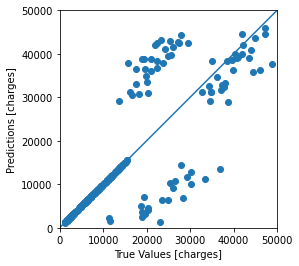

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predict)
plt.xlabel('True Values [charges]')
plt.ylabel('Predictions [charges]')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)